# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I selected the TMDb movie dataset where this data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
<br>These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc.

### The potiental problem that can be discussed in the dataset:
The dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average. It also contains some basic information corresponding to the movie like cast, director, keywords, runtime, genres, etc. Any of the basic information can be a key to a success movie. More specificly, these factors can be classified to two categrories as follows:
#### Metrics  for Evaluating the Success Movie
- popularity
- revenue
- vote average score

#### Potential Key to Affect the Success of a Movie
- Budget
- Cast
- Director
- Tagline
- Keywords
- Runtime
- Genres
- Production Companies
- Release Date
- Vote Average

Since the dataset is featured with the rating of movies as mentioned above, it contains plentiful information for exploring the properties that are associated with successful movies, which can be defined by high popularity, high revenue and high rating score  movies. Besides, the dataset also contains the movie released year, so it also can let us to explore the trend in these movie metrics. Therefore, the qestions I am going to explore are including three parts:

**Research Part 1: General Explore**
   - Question 1: Popularity Over Years
   - Question 2: The distribution of revenue in different popularity levels in recent five years.
   - Question 3: The distribution of revenue in different score rating levels in recent five years.
   
**Research Part 2 : Find the Properties are Associated with Successful Movies**
   - Question 1: What kinds of properties are associated with movies that have high popularity?
   - Question 2: What kinds of properties are associated with movies that have high voting score?

**Research Part 3 Top Keywords and Genres Trends by Generation**
   - Question 1: Number of movie released year by year
   - Question 2: Keywords Trends by Generation
   - Question 3: Genres Trends by Generation

<a id='wrangling'></a>
## Data Wrangling

### General Dataset Properties 

First, let's investigate the dataset and import all required packages:

In [5]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
#see the column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the table above, there are totally 10866 entries and total 21 columns. And there exists some null value in the cast, director, overview and genres columns. But some columns are with **a lot of null value rows** like homepage, tagline, keywords and production_companies, especially the **homepage** and **tagline** columns are even not necessary for answering the question, so I decide to drop both of the columns on the stage.

Let's see some descriptive statistics for the data set:

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As the table shown above, there are a lot of **zero number** in **budget** and **revenue** data, so is **runtime**. Didn't these movies be released? Look at the data in release_year column, I find all movies in the dataset are released becauce **the minimum value is 1960 and there is no null value for it**. So I assume the zero values in the budget and revenue are missing data. But under the risk that these zero values may be just small values, I preceed to take a look for some zero data content to decide whether it is just a missing value or small value.

Let's take a look at some zero budget and revenue data:

In [10]:
#filter the zero budget data
df_budget_zero = df.query('budget == 0')
# choice the first three randomly
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [11]:
#filter the zero revenue data
df_revenue_zero = df.query('revenue == 0')
# choice the first three randomly
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


budget and revenue columns have sum missing values. Drop them out or set them as null values will affect some statistics and the visualiation result in those question.

To decide whether to drop them out or set them as null values, I count the number of the zero values in the two columns:

In [12]:
#count zero values in budget data using groupby
df_budget_0count =  df.groupby('budget').count()['id']
df_budget_0count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

I count the zero value in the **budget** cloumn and there are 5696 rows in zero value. In case I drop too many raw data to keep the data integrity, I decide to retain these rows and replace zero values with null values.

So does the **revenue** column:

In [13]:
#count zero values in revenue data using groupby
df_revenue_0count =  df.groupby('revenue').count()['id']
df_revenue_0count.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

It contains 6016 rows in zero values, so I also dicide to keep these rows and replace zero values with null values.

Finally, let's investigate the **runtime** column to decide whether drop zero or just replace it with null value.

In [14]:
#count zero values in runtime data using groupby
df_runtime_0count =  df.groupby('runtime').count()['id']
df_runtime_0count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

It's just has a small number of zero value rows in runtime column, so I decide to drop them.

### Cleaning Decision Summary
1. Drop unnecessary columns for answering those questions : homepage, tagline, imdb_id, overview,budget_adj and revenue_adj.
2. Drop duplicates.
3. Drop null values columns that with small quantity of nulls : cast, director, and genres.
4. Replace zero values with null values in the budget and revenue column.
5. Drop zero values columns that with small quantity of zeros : runtime.

### Data Cleaning 

First, according to the previous decision, let's drop unncessary columns : imdb_id, homepage, tagline, overview.

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop extraneous columns
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [16]:
# see if these columns are dropped.
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [17]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

Then, drop the null values in cast, director and genres columns.

In [18]:
#drop the null values in cast, director, genres columns
cal2 = ['cast', 'director', 'genres']
df.dropna(subset = cal2, how='any', inplace=True)

In [19]:
# see if nulls are dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Then, replace zero values with null values in the budget and revenue column.

In [20]:
#replace zero values with null values in the budget and revenue column.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


Finally, drop columns with small quantity of zero values : runtime.

In [21]:
# directly filter the runtime data with nonzero value
df.query('runtime != 0', inplace=True)
#check
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


### Cleaning Result Summary

From bellow, we can see that the data in each column are almost clear without too many null values. And my clearning goal is also to keep the data integrity from the original one. Although there are some null values in **keywords** and **production companies** columns, it is still useful for analysis, and in fact the number of their null values are not very huge, so I just kept both of them. The data now with 10703 entries and 15 columns.</b>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


And from the table bellow, after transfer all zero values to null values in **budget** and **revenue** data, we can see that both the distribution of budget and revenue are much better, without too concentrate on the zero value or small values.  And after deleting the zero values of runtime, we can see the minimum value of runtime is more reasonable.

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

**<a href="#r1">Research Part 1: General Explore</a>**
   - <a href="#r1q1">Question 1: Popularity Over Years.</a>
   - <a href="#r1q2">Question 2: The distribution of popularity in different revenue levels in recent five years. </a>
   - <a href="#r1q3">Question 3: The distribution of score rating in different revenue levels in recent five years.</a>
   
**<a href="#r2">Research Part 2 : Find the Properties are Associated with Successful Movies</a>**
   - <a href="#r2q1">Question 1: What kinds of properties are associated with movies that have high popularity?</a>
   - <a href="#r2q2">Question 2: What kinds of properties are associated with movies that have high voting score?</a>
   
**<a href="#r3">*Research Part 3 Top Keywords and Genres Trends by Generation</a>**
   - <a href="#r3q1">Question 1: Number of movie released year by year.</a>
   - <a href="#r3q2">Question 2: Keywords Trends by Generation.</a>
   - <a href="#r3q3">Question 3: Genres Trends by Generation.</a>

<a id='r1'></a>
## Research Part 1: General Explore

<a id='r1q1'></a>
### Question 1: Popularity Over Years

To explore this question, let's take a look of the dataset.

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To analysis the question, I computed the mean of popularity in each year, and then plot lines to see the trends. Moreever, since the popularity has no upper bound, in case the mean of popularity is affected by the outlier, I also compute the median for analysising this question. 

In [25]:
# compute the mean for popularity
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.tail()

release_year
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [26]:
# compute the median for popularity
p_median = df.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2011    0.420930
2012    0.344263
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

We can see that the median data for popularity is more smoother.

Now, let's visualize it.

In [28]:
# build the index location for x-axis
index_mean = p_mean.index
index_median = p_median.index

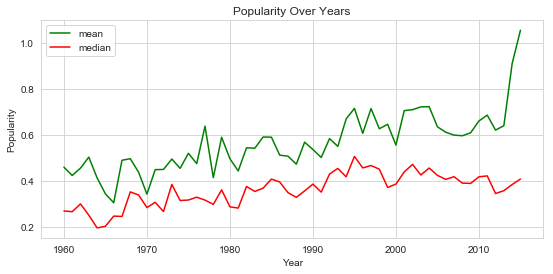

In [32]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

From the figure above, we can see that the trend of popularity mean is upward year to year, and the peak is in the 2015, while the trend of popularity median is slightly smoother in recent years. We still can conclude that on average, popularity over years is going up in recent years. The trend is reasonable due to the eaiser access of movie information nowadays. Moreover, in the Internet age, people can easily search and gether movie information, even watch the content through different sources. Maybe it is such the backgroud that boost the movie popularity metrics.

#### Investigate single variate exploration:

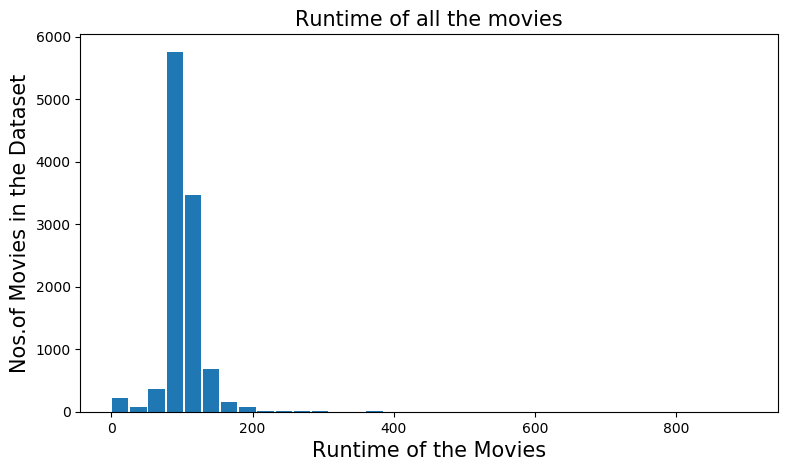

In [50]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

<a id='r1q2'></a>
### Question 2: The distribution of popularity in different revenue levels in recent five years. 

The movies popularity is growing up in recently years, but how about the popularity in different revenue levels? will popularity be more higher in high revenue level? In this research I don't dicuss the revenue trend since it is affected by many factors.

Hence, it leads me that what to find out the distribution of popularity look like in terms of different revenue levels which means I can see the what popularity with which revenue levels.  Dou to the revenue data contains wide range, to be more specific, I divided the revenue data into levels: Low', 'Medium', 'Moderately High', 'High' according to their quartile. Also I choose the recent five years data to dicuss in order to focus on the current data feature.

For the further usage of the level-diveded procedure with quartile, I build a **cut_into_quantile** function to divided data into  levels according to their quartile: 'Low', 'Medium', 'Moderately High', 'High'.

In [33]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

Since I want to explore the data by year to year in the question, so to avoide the different level affecting among each year's revenue, I divide revenue levels by with each year's revenue quartile .

In [34]:
#choose the recent five years 
dfyear =[2011,2012,2013,2014,2015]
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = df.query('release_year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(dfn,'revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.info()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035 entries, 3371 to 628
Data columns (total 16 columns):
id                      3035 non-null int64
popularity              3035 non-null float64
budget                  1227 non-null float64
revenue                 1143 non-null float64
original_title          3035 non-null object
cast                    3035 non-null object
director                3035 non-null object
keywords                2385 non-null object
runtime                 3035 non-null int64
genres                  3035 non-null object
production_companies    2703 non-null object
release_date            3035 non-null object
vote_count              3035 non-null int64
vote_average            3035 non-null float64
release_year            3035 non-null int64
revenue_levels          1143 non-null category
dtypes: category(1), float64(4), int64(4), object(7)
memory usage: 382.5+ KB


Now we can see we create a **revenue_levels** column with the same rows with **revenue**.

Then use the dataset to explore the popularity in each level each year.

In [35]:
# group the dataframe we created above with each revenue levels in each year, find the popularity meadian
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail(8)

id  popularity      budget      revenue  \
release_year revenue_levels                                                   
2014         Low              244783.0    0.559472   5500000.0     149337.0   
             Medium           234200.0    0.778247   6000000.0    6833445.0   
             Moderately High  227157.5    1.144553  22000000.0   53506007.5   
             High             157350.0    3.327799  68000000.0  268031828.0   
2015         Low              301284.0    0.506000   7500000.0     228615.0   
             Medium           272606.5    0.921828  13000000.0   11893552.5   
             Moderately High  273980.0    1.750452  19000000.0   61365324.5   
             High             253770.0    3.923328  81000000.0  244935102.0   

                              runtime  vote_count  vote_average  
release_year revenue_levels                                      
2014         Low                 96.0       129.0          6.00  
             Medium             102.0       234.0          6.30  
             Moderately High    106.0       478.5          6.30  
             High               113.0      1829.0          6.60  
2015         Low                 98.5        79.5          5.85  
             Medium             105.0       242.5          6.15  
             Moderately High    108.0       614.5          6.40  
             High               117.0      1576.5          6.50

Plot a bar chart:

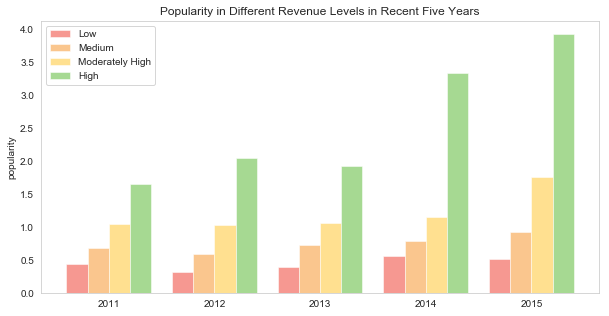

In [36]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['popularity'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('popularity')

# Set the chart's title
ax.set_title('Popularity in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

**We can see that movies with higher revenue level are with higher popularity in recent five years.**

We can see that revenue level has postive relation with popularity. The result is reasonable since it makes me think of if movie producer wants to make high revenue movies, the first thing they always is **to promote it and make it popular.** So according the result from the previous question, I infer that a high revenue movie is always with a higher popularity than movies with lower revenue levels. So if we define success of a movie is it's revenue, one property it has is the high popularity.

**But what about the score rating distribution in different revenue levels of movies? Does high revenue level movie has the property of high score rating?** Let's explore on the next question.

<a id='r1q3'></a>
### Question 3: The distribution of revenue in different score rating levels in recent five years. 

Use the same procedure on Question 2 to explore this question.

In [37]:
# group the dataframe we created above with each revenue levels in each year, find the vote_average mean
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).mean()
dfq2_summary.tail(4)

id  popularity        budget  \
release_year revenue_levels                                             
2015         Low              288091.296296    0.672883  7.802640e+06   
             Medium           268269.129630    1.224921  1.779000e+07   
             Moderately High  267348.962963    2.017584  2.311923e+07   
             High             219819.685185    5.369140  9.754528e+07   

                                   revenue     runtime   vote_count  \
release_year revenue_levels                                           
2015         Low              7.311892e+05  101.851852   106.592593   
             Medium           1.399316e+07  105.092593   266.703704   
             Moderately High  6.356421e+07  107.537037   684.018519   
             High             4.173124e+08  117.703704  1952.944444   

                              vote_average  
release_year revenue_levels                 
2015         Low                  5.918519  
             Medium               6.103704  
             Moderately High      6.362963  
             High                 6.496296

Plot the bar chart:

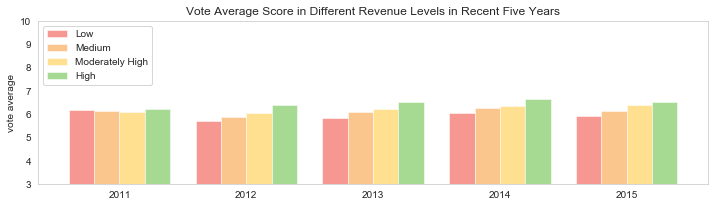

In [38]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,3))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['vote_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('vote average')

# Set the chart's title
ax.set_title('Vote Average Score in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

From the chart above, we can see that there is no big difference of movie rating between each revenue level. So it can be concluded that the high revenue movies doesn't have the significant high score rating.

## Part 1 Question Explore Summary

1. Movie popularity trend is growing from 1960, I infer that it is with the background that nowadays movie information and rating system are more accessible by Internet with different channels.<br>
2. Movies with higher revenue level are with higher popularity in recent five years. In other words, a high revenue movie always with a higher popularity. So on the next part, I will explore: **What's properties that are associated with high popularity movies?** <br>
3. Movies with higher revenue level don't have the significant high score rating than other revenue levels in recent five years. So on the next part, I will explore: **What's properties that are associated with high rating movies?**



<a id='r2'></a>
## Research Part 2 : Find the Properties are Associated with Successful Movies
- <b>Question 1: What kinds of properties are associated with movies that have high popularity?</b>
    1. What's the budget level movie are associated with movies that have high popularity?
    2. What's the runtime level are associated with movies that have high popularity on average?
    3. What's casts, directors, keywords, genres and production companies are associated with high popularity?
    

- <b>Question 2: What kinds of properties are associated with movies that have high voting score?</b>
    1. What's the budget level are associated with movies that have high voting score?
    2. What's the runtime level are associated with movies that have high voting score?
    3. What's the directors, keywords, genres are associated with voting score?
  

### Function and research sample prepare


In the dataset, the potential properties associated with movies can be **runtime**, **budget**, **cast**, **director**, **keywords**, **genres**, **production companies**. These data are including two types: quantitative data and categorical data. Both **runtime** and **budget** data are quantitative data; the others are categorical data.

- For quantitative data, since the data is quantitative, I can devide the data into various levels and find the properties in all range of movies success, I choose to use the whole dataset and then divided runtime and budget into four levels according to their quartile: 'Low', 'Medium', 'Moderately High', 'High' in all time range. And then find out what's the runtime and budget level with higher degree of movies popularity/voting score.


- For categorical data, which are **cast**, **director**, **keywords** and **genres**, since we are not necessary to discuss all the range of of movies success(which is also difficult to dicuss), I just focus on the high popularity or high rating, so I filter the top 100 popular/ high voting score movies data *in each year*, and then count the number of occurrences in every category every year to find their properties. Forthermore, in case that the top frequent occurrences are also appeared in the worst popular/ high voting score movies, I also filter the worst 100 popular/ high voting score movies in every year and then compare the result to top 100's. If the top frequent occurrences also appear in the worst movies, I am going to include these factors as properties associated with top movies as well as worst movies. Besides, these data are contain the pipe (|) characters so first I have to spilt them.


### <b>A. Function Prepare-- Build a level-devide function and a split string function.<b/>

**A)The cut_into_quantile function- general use.**

   The function is the same I ued in the Part 1 Question. So I just past it again below.

In [39]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

**B) Split pipe (|) characters and then count their number of appeared times, then find the top three factor.**

In [40]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

### <b>B. Sample prepare-- Filter Top 100 and Worst 100 movies in each year as the research sample.<b/>

<b>A) Select Top 100 popular movies in every year.</b>

In [41]:
# Select Top 100 popular movies.
# fisrt sort it by release year ascending and popularity descending
df_top_p = df.sort_values(['release_year','popularity'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_p = df_top_p.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high popularity to low
df_top_p.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


<b>B) Select Top 100 high revenue movies in every year.</b>

In [42]:
# Select Top 100 high revenue movies.
# fisrt sort it by release year ascending and revenue descending
df_top_r = df.sort_values(['release_year','revenue'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_r = df_top_r.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high revenue to low
df_top_r.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960
1,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960


<b>C) Select Top 100 high score rating  movies in every year.</b>

In [43]:
# Select Top 100 high scorer ating movies.
# fisrt sort it by release year ascending and high scorer ating descending
df_top_s = df.sort_values(['release_year','vote_average'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_s = df_top_s.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high scorer ating to low
df_top_s.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


<b>D) To compare to results, I also create three subdataset for the last 100 movies.</b>

In [44]:
# the last 100 popular movies in every year
df_low_p = df.sort_values(['release_year','popularity'], ascending=[True, True])
df_low_p = df_low_p.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 high revenue movies in every year
df_low_r = df.sort_values(['release_year','revenue'], ascending=[True, True])
df_low_r = df_low_r.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 score rating movies in every year
df_low_s = df.sort_values(['release_year','vote_average'], ascending=[True, True])
df_low_s = df_low_s.groupby('release_year').head(100).reset_index(drop=True)

<a id='r2q1'></a>
## Question 1: What kinds of properties are associated with movies that have high popularity?


1. What's the budget level movie are associated with movies that have high popularity?
2. What's the runtime level are associated with movies that have high popularity on average?
3. What's casts, directors, keywords, genres and production companies are associated with high popularity?


## 1.1 What's the budget level movie are associated with movies that have high popularity?

First, divided budget data into four levels with it's quartile: 'Low', 'Medium', 'Moderately High', 'High' and create a level column.

In [45]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(df,'budget')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High


From the table above, I built a **budget_levels** columns.

In [46]:
# Find the mean and median popularity of each level with groupby
result_mean = df.groupby('budget_levels')['popularity'].mean()
result_mean 

budget_levels
Low                0.510678
Medium             0.726490
Moderately High    0.988660
High               1.821742
Name: popularity, dtype: float64

In [47]:
result_median = df.groupby('budget_levels')['popularity'].median()
result_median

budget_levels
Low                0.367621
Medium             0.507987
Moderately High    0.733975
High               1.232098
Name: popularity, dtype: float64

Let's visualize it.

In [48]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

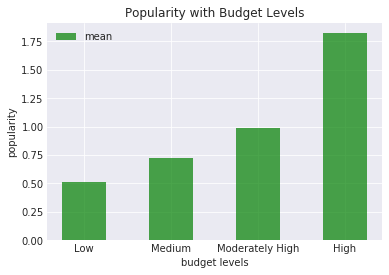

In [487]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

From the figure above, we can see that **movies with higher popularity are with higher budget level.** The result is reasonable since movies with higher popularity may has a higher promoting advertising cost. And with the high promotion level people always have more probability to get know these movies. 

## 1.2 What's the runtime level are associated with movies that have high popularity on average?

Divided runtime data into four levels with it's quartile: 'Short', 'Medium', 'Moderately Long', 'Long'.

In [49]:
df = cut_into_quantile(df,'runtime')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High


In [50]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['popularity'].mean()
result_mean

runtime_levels
Low                0.418723
Medium             0.551560
Moderately High    0.656342
High               1.019749
Name: popularity, dtype: float64

In [51]:
# Find the median popularity of each level with groupby
result_median = df.groupby('runtime_levels')['popularity'].median()
result_median

runtime_levels
Low                0.290399
Medium             0.366125
Moderately High    0.420568
High               0.529933
Name: popularity, dtype: float64

Let's visualize it.

In [52]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars

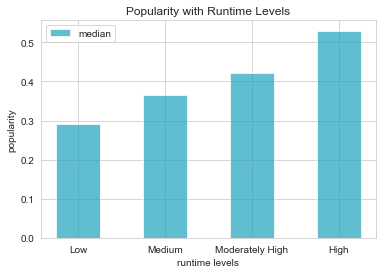

In [53]:
# plot bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

We can see that the higher popularity movies has longer run time.

## 1.3 What's casts, directors, keywords, genres and production companies are associated with high popularity?

First, choose the dataset-df_top_p. It is the dataframe about top 100 popular movies in each year.

In [54]:
df_top_p.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960
2,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960


Then, find the three highest occurrences in each category among the top 100 popular movies. And store the result table into variables in order to create a summary table:

In [55]:
# find top three cast
a = find_top(df_top_p.cast)
# find top three director
b = find_top(df_top_p.director)
# find top three keywords
c = find_top(df_top_p.keywords)
# find top three genres
d = find_top(df_top_p.genres)
# find top three production companies
e = find_top(df_top_p.production_companies)

Use the result above to create a summary table:

In [56]:
#Use the result above to create a summary dataframe.
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_keywords': c.index, 'popular_genres': d.index, 'popular_producer': e.index})
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,based on novel,Drama,Warner Bros.
1,Bruce Willis,Steven Spielberg,sex,Comedy,Universal Pictures
2,Nicolas Cage,Martin Scorsese,dystopia,Thriller,Paramount Pictures


Finally, find the three highest occurrences in each category among the 100 unpopular movies:

In [57]:
# call the dataset wiht the 100 unpopular movies in each year
df_low_p.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,9/9/60,13,6.1,1960


In [58]:
# find top three cast among the among the 100 unpopular movies
na = find_top(df_low_p.cast)
# find top three director among the among the 100 unpopular movies
nb = find_top(df_low_p.director)
# find top three keywords among the among the 100 unpopular movies
nc = find_top(df_low_p.keywords)
# find top three genres among the among the 100 unpopular movies
nd = find_top(df_low_p.genres)
# find top three production companiess among the among the 100 unpopular movies
ne = find_top(df_low_p.production_companies)

In [59]:
df_unpopular = pd.DataFrame({'unpopular_cast': na.index, 'unpopular_director': nb.index, 'unpopular_keywords': nc.index, 'unpopular_genres': nd.index, 'unpopular_producer': ne.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Clint Eastwood,Woody Allen,independent film,Drama,Universal Pictures
1,Michael Caine,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Sean Connery,Blake Edwards,sex,Thriller,Paramount Pictures


Now, we get the two table that list the properties occurred the most among the top 100 popular movies each year, among the top 100 unpopular movies each year respectively.

Now we can campare the two tables and find out What's casts, directors, keywords, genres and production companies are associated with high popularity.

In [60]:
# compare
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,based on novel,Drama,Warner Bros.
1,Bruce Willis,Steven Spielberg,sex,Comedy,Universal Pictures
2,Nicolas Cage,Martin Scorsese,dystopia,Thriller,Paramount Pictures


From the tabbles above, we can find that cast *Michael Caine* is appeared in both popular and unpopular movies; director *Woody Allen* and *Clint Eastwood* are appeared in both popular and unpopular movies; all three genres *Drama*, *Comedy*, *Thriller* are appeared in both popular and unpopular movies; *sex* is appeared in both popular and unpopular movies; all three producer *Universal Pictures*, *Warner Bros*, *Paramount Pictures* are appeared in both popular and unpopular movies. The summary are as follows:


- **Cast associated with high popularity movies**: **Robert De Niro** and **Bruce Willis**. It's really reasonable because I have seen a lot of promoted movies content which are performed by them in my country. On average I think they do have the huge popularity in past years!
- **Director associated with high popularity movies**: **Steven Spielberg**. It's no doubt that he got the first place since he has won so many awards and honors for his high quality and popular work!
- **Both of the most popular and unpopular movies are associated three mainly genres: Drama, Comedy, and Thriller.** I just can infer that these genres are common in the movie industry.
- **Keywords associated with high popularity movies**: **based on novel** and **dystopia**. It' also no doubt it comes out the result. Especially the based on novel movies, since nowadays tons of movies are made based on novel like Harry Potter, The Hunger Games etc, and they were also famous in my country.
- **Producer associated with high popularity movies and unpopularity movies**: **Warner Bros.**, **Universal Pictures** and **Paramount Pictures**. The three giants of movie indusry did produce such a various quality movies!


<a id='r2q2'></a>
### Question 2: What kinds of properties are associated with movies that have high voting score?

1. What's the budget level are associated with movies that have high voting score?<br>
2. What's the runtime level are associated with movies that have high voting score?<br>
3. What's the directors, keywords, genres are associated with voting score?


Use the same procedure with Research 2, Question 1 to answer these questions.

## 2.1 What's the budget level are associated with movies that have high voting score?

First, use the dataframe with **budget level** I have created in the previous question. Then find the mean and median of **vote_average** group by different budget level.

In [62]:
# Find the mean and median voting score of each level with groupby
result_mean = df.groupby('budget_levels')['vote_average'].mean()
result_mean

budget_levels
Low                5.947569
Medium             6.016922
Moderately High    6.066133
High               6.104504
Name: vote_average, dtype: float64

In [63]:
result_median = df.groupby('budget_levels')['vote_average'].median()
result_median

budget_levels
Low                6.0
Medium             6.1
Moderately High    6.1
High               6.1
Name: vote_average, dtype: float64

Let's use the mean table above to visualize it

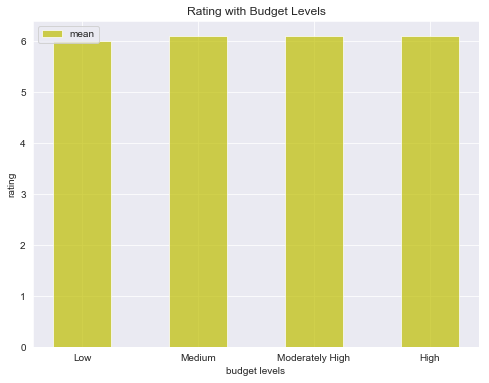

In [64]:
# plot bars
#set style
sns.set_style('darkgrid')
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_median, width, color='y', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('budget levels')
plt.title('Rating with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left') 

We can see that there is almost no difference in average voting score at different budget levels. So from the result, maybe high budget of a movie is not necessary to a good quality of movie!

## 2.2 What's the runtime level are associated with movies that have high voting score?

First, use the dataframe with **runtime level** I have created in the previous question. Then find the mean and median of **vote_average** group by different runtime level.

In [65]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['vote_average'].mean()
result_mean

runtime_levels
Low                5.726425
Medium             5.724355
Moderately High    6.044946
High               6.401297
Name: vote_average, dtype: float64

In [66]:
result_median = df.groupby('runtime_levels')['vote_average'].median()
result_median

runtime_levels
Low                5.8
Medium             5.8
Moderately High    6.1
High               6.4
Name: vote_average, dtype: float64

Let's visualize it.

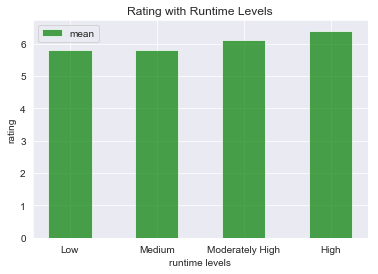

In [67]:
sns.set_style('darkgrid')
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
bars = plt.bar(ind, result_median, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('runtime levels')
plt.title('Rating with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

We can see that there is no big difference in average voting score in different runtime levels. So from the result, maybe long runtime of a movie is not necessary to a good quality of movie!

## 2.3 What's the directors, keywords, genres are associated with voting score?

First, choose the **dataset-df_top_s**. It is the dateframe about top 100 high voting score movies in each year.

In [68]:
df_top_s.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


Then, find the three highest occurrences in each category among the top 100 high voting score movies. And store the result table into variables in order to create a summary table.

In [69]:
# find top three director
a = find_top(df_top_s.director)
# find top three keywords
b = find_top(df_top_s.keywords)
# find top three genres
c = find_top(df_top_s.genres)

Use the result above to create a summary table.

In [70]:
#create a summary dataframe.
df_high_score = pd.DataFrame({'high_score_director': a.index, 'high_score_keywords': b.index, 'high_score_genres': c.index})
df_high_score

,high_score_director,high_score_keywords,high_score_genres
0,Woody Allen,based on novel,Drama
1,Martin Scorsese,independent film,Comedy
2,Clint Eastwood,woman director,Thriller


Finally, find the three highest occurrences in each category of the worst 100 rating score movies.

In [71]:
# call the dataset wiht the 100 low rating movies in each year
df_low_s.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960
1,6643,0.421043,NaN,NaN,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,indian|texas|farm|siblings|saddle,125,Action|Drama|Western,James Productions,1/1/60,17,4.9,1960


In [72]:
# find top three director among the among the 100 low rating movies
na = find_top(df_low_s.director)
# find top three keywords among the among the 100 low rating movies
nb = find_top(df_low_s.keywords)
# find top three genres among the among the 100 low rating movies
nc = find_top(df_low_s.genres)

Use the result above to create a summary table.

In [73]:
df_low_score = pd.DataFrame({'low_score_director': na.index, 'low_score_keywords': nb.index, 'low_score_genres': nc.index})
df_low_score

,low_score_director,low_score_keywords,low_score_genres
0,Woody Allen,sex,Comedy
1,John Carpenter,independent film,Drama
2,John Landis,female nudity,Thriller


In [74]:
# compare
df_high_score

,high_score_director,high_score_keywords,high_score_genres
0,Woody Allen,based on novel,Drama
1,Martin Scorsese,independent film,Comedy
2,Clint Eastwood,woman director,Thriller


After summing up both tables above, we can find that:
1. Martin Scorsese and Clint Eastwood have made top quality movies on average over the past years from 1960.<br>
2. The top quality movies have the keywords with *based on novel* and *woman director* over the past years from 1960. The *based on novel* keyword are also with the top popular movies, but the result of woman director amazed me! 

## Part 2 Question Explore Summary

1. For the properties are associated with high popularity movies, they are **high budget levels** and **longer run time**. And **cast** associated with high popularity movies are **Robert De Niro** and **Bruce Willis**; **director** associated with high popularity movies are **Steven Spielberg**; **genres** associated with high popularity movies are **drama**, **comedy**, and **thriller** but they also appeared in the most unpopular movies; **keywords** associated with high popularity movies are based on **novel** and **dystopia**; **producer** associated with high popularity movies are **Warner Bros.**, **Universal Pictures** and **Paramount Pictures**, but they are also appeared in the most unpopular movies.

2. Each level in both **runtime** and **budget** don't have obvious different high rating score. In other words, the low budget level or the low budget may still have a high rating. And **Martin Scorsese** and **Clint Eastwood** have made top quality movies on average over the past years from 1960; the top quality movies have the **keywords** with **based on novel** and **woman director** over the past years from 1960.

<a id='r3'></a>
## Research Part 3 Top Keywords and Genres Trends by Generation


- Question 1: Number of movie released year by year<br>
- Question 2: Keywords Trends by Generation<br>
- Question 3: Genres Trends by Generation
  


In question 1, I am going to find out the number of movie released year by year.
    
In question 2 and 3, I am going to find out what's the keyword and genre appeared most by generation? To do this:
- Step one: group the dataframe into five generations: 1960s, 1970s, 1980s, 1990s and 2000s<br>
- Step two: use the **find_top** function to count out the most appeared keyword and genre in each generation dataframe.


<a id='r3q1'></a>
## Question 1: Number of movie released year by year

First, use group by release year and count the number of movie released in each year.

In [75]:
movie_count = df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Then visualize the result.

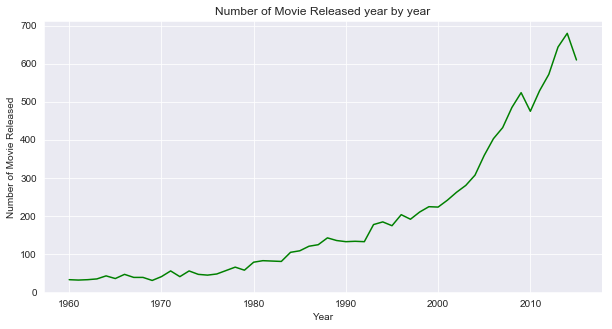

In [76]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

We can see that the number of movie released are increasing year by year. And the it is the accelerated growth since the curve is concave upward. 

<a id='r3q2'></a>
## Question 2: Keywords Trends by Generation

First, sort the movie release year list to group the dataframe into generation.

In [77]:
# sort the movie release year list.
dfyear= df.release_year.unique()
dfyear= np.sort(dfyear)
dfyear

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

Then, build the generation catagory of 1960s, 1970s, 1980s, 1990s and 2000s.

In [78]:
# year list of 1960s
y1960s =dfyear[:10]
# year list of 1970s
y1970s =dfyear[10:20]
# year list of 1980s
y1980s =dfyear[20:30]
# year list of 1990s
y1990s = dfyear[30:40]
# year list of afer 2000
y2000 = dfyear[40:]

Then for each generation dataframe, use the find_top to find out the most appeared keywords, then combine this result to a new datafram.

In [79]:
# year list of each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.keywords,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,after2000,347


Now, we get the keywords of most filmed movies in each generation. We can see that in 1960s and 1970s, the top keywords was *based on novel*, which means movies with the keyword based on novel are released most according the dataset. In 1980s, the top keyword was *nudity*, what a special trend! In 1990s, *independent film* became the top keyword. And after 2000, the movie with the feature *woman director* were released most. It's sounds great!

Now let's visualize the result.

Text(0.5,1,'Keywords Trends by Generation')

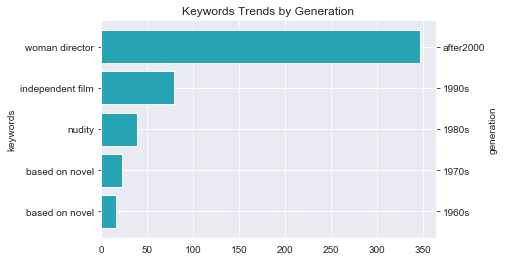

In [80]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
keywords = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the keywords number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(keywords)
#set left side y axis label
ax.set_ylabel('keywords')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27a5b4')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Keywords Trends by Generation')

One more thing, we can see that the number of the keywords appeared changes from 16 to 347 by generation, and it is resonable since the trend is consistent with the number of movie released.

<a id='r3q3'></a>
## Question 3: Genres Trends by Generation

Use the same procedure as Question 2, first use the `find_top` to find out the most appeared genres, then combine this result to a new datafram.

In [81]:
# year list of each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.genres,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3

,year,top
Drama,1960s,167
Drama,1970s,238
Comedy,1980s,428
Drama,1990s,862
Drama,after2000,3050


Visualize the result.

Text(0.5,1,'Genres Trends by Generation')

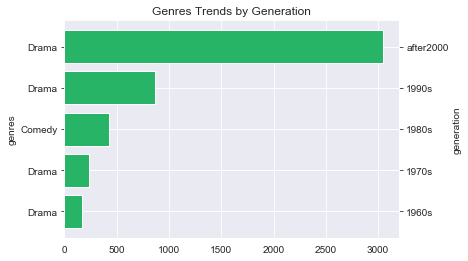

In [82]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27b466')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Trends by Generation')

We can see that the genre `Drama` are the most filmed in almost all generation. Only the 1980s are dominated by the `comedy` type. 

## Part 3 Question Explore Summary

1. The number of movie released are increasing year by year. And the it is in the accelerated growth trend.
2. In 1960s and 1970s, the top keywords was **based on novel**, which means movies with the keyword based on novel are released most according the dataset. In 1980s, the top keyword was **nudity**. In 1990s, **independent film** became the top keyword. And after 2000, the movie with the feature **woman director** were released most.
3. The genre **Drama** are the most filmed in almost all generation. Only the 1980s are dominated by the **comedy** type.

<a id='conclusions'></a>
## Conclusions

The goal in the research is primary to explore three parts questions:

** Part one: General Explore**
    
   At part one, I explored some general questions. The result turned out that the movie popularity trend is growing from 1960 on average. Moreever, I focused on the movies which are with high revenue. I found movies with higher revenue level are with higher popularity in recent five years on average. Besides, movies with higher revenue level don't have the significant high score rating in recent five years. And this results made me want to learn more: What's properties that are associated with high popularity movies? What's properties that are associated with high high voting score?
    
** Part two: Find the Properties are Associated with Successful Movies**
   
   At this part, I first found out the properties that are associated with high popularity movies. They were with high budget levels and longer run time.  And cast associated with high popularity movies are Robert De Niro and Bruce Willis; director associated with high popularity movies are Steven Spielberg; genres associated with high popularity movies are drama, comedy, and thriller but they also appeared in the most unpopular movies; keywords associated with high popularity movies are based on novel and dystopia; producer associated with high popularity movies are Warner Bros., Universal Pictures and Paramount Pictures, but they are also appeared in the most unpopular movies.
   
   And the I found out the properties that are associated with high high voting score. Each level in both runtime and budget don't have obvious different high rating score. In other words, the low budget level or the low budget may still have a high rating. And Martin Scorsese and Clint Eastwood have made top quality movies on average over the past years from 1960; the top quality movies have the keywords with based on novel and woman director over the past years from 1960.
   
   
**Part three: Top Keywords and Genres Trends by Generation**
   
   In this part, I explored the number of movie released trend year by year. Then explored the keywords and genres trends, with group the dataframe into five generations: 1960s, 1970s, 1980s, 1990s and 2000s.
   
   The number of movie released are increasing year by year. And the it is in the accelerated growth trend. Besides, In 1960s and 1970s, the top keywords was based on novel, in 1980s, the top keyword was nudity. In 1990s, independent film became the top keyword. And after 2000, the movie with the feature woman director were released most.
   Further more, the genre Drama are the most filmed in almost all generation. Only the 1980s are dominated by the comedy type.

To sum up, I did find a lot of interesting information among the dataset, just hope that I can dig more! But there are still some limitations.

## Limitation
1. Data quality: althought I assume the zero values in revenue and budget column are missing, there are still a lot of unreasonable small/big value in the both of the columns. Also, the metrics about rating or popularity are not defined clearly, and the basis of them may be changing year by year.
2. Although the the `popularity` doesn't have the upperbound , it actually have the high probability of having outliers. But I choose to retain the data to keep the data originalty. Maybe there are still the reason that I should take it into account.
2. Units of revenue and budget column: I am not sure that the budgets and revenues all in US dollars? 
3. The inflation effect: I used the revenue and budget data to explore, but I didn't use the adjusted data, although it is provided the adjusted data based on the year 2010.
4. In my reseach one, although I discussed the distribution of popularity in different revenue levels in recent five years, but I just cut the revenue levels based on it's quantile. I didn't find out the whole revenue distributin in the fisrt, so there may be exist risks that the high revenue level still cover a wide of range, and may affect the final result. Besides, in the part, I just discuss data in the recent five year, maybe in other year there are some different distribution.
5. In research two, I dicussed the properties are associated with successful movies. The successful I defined here are high popularity and high voting score. But I didn't find the properties of high revenue since I just assume the high revenue level are with higher popularity, which is I found in research one, so it makes me just leave out the finding the properties of high revenue movie. But I think there must be some other factor that are associated with high revenue movies.
6. In research two, I dicussed the budget level and runtime level properties, but I just cut both of them based on the whole time quantile data not year by year. Also, to cut them into four levels based on quantile still rough.
7. The categorical data, when I analysed them, I just split them one by one, and count them one by one. But the thing is, there must be some effect when these words combine. For example, the keyword `based on novel` is popular, but what truly keyword that makes the movie sucess maybe the `based on novel`&`adventure`. 
8. I didn't count number of votes into consideration, so the rating score may be a bias whe the vote number is few.

In [521]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0